# Importing Libraries

In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

# Importing Dataset

In [4]:
path=r'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data '
path

'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data '

In [5]:
df=pd.read_csv(os.path.join(path, 'insurance_final.csv'))

# Cleaning,manipulations, and reprocessing dataset

In [7]:
# Display the first few rows of the dataframe
df.head(), df.dtypes

(   Unnamed: 0       age     sex       bmi  children  smoker   charges  \
 0           0 -1.440418  female -0.453160         0       1  0.297857   
 1           1 -1.511647    male  0.509422         1       0 -0.954381   
 2           2 -0.799350    male  0.383155         3       0 -0.729373   
 3           3 -0.443201    male -1.305052         0       0  0.719104   
 4           4 -0.514431    male -0.292456         0       0 -0.777499   
 
    region_northwest  region_southeast  region_southwest  overweight  
 0             False             False              True           0  
 1             False              True             False           0  
 2             False              True             False           0  
 3              True             False             False           0  
 4              True             False             False           0  ,
 Unnamed: 0            int64
 age                 float64
 sex                  object
 bmi                 float64
 children  

In [8]:
# Drop the categorical and unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'sex', 'region_northwest', 'region_southeast', 'region_southwest'])

In [9]:
# Check the mean and standard deviation to verify standardization
stats = df_cleaned.describe().loc[['mean', 'std']]

In [10]:
df_cleaned.head(), stats

(        age       bmi  children  smoker   charges  overweight
 0 -1.440418 -0.453160         0       1  0.297857           0
 1 -1.511647  0.509422         1       0 -0.954381           0
 2 -0.799350  0.383155         3       0 -0.729373           0
 3 -0.443201 -1.305052         0       0  0.719104           0
 4 -0.514431 -0.292456         0       0 -0.777499           0,
                age           bmi  children    smoker       charges  overweight
 mean -6.111624e-17 -2.178927e-16  1.095737  0.204936 -1.009747e-16         0.0
 std   1.000374e+00  1.000374e+00  1.205571  0.403806  1.000374e+00         0.0)

In [11]:
# Rename columns
df_renamed = df_cleaned.rename(columns={
    'children': 'num_children',
    'charges': 'insurance_charges'
})

df_renamed.head()

,age,bmi,num_children,smoker,insurance_charges,overweight
0,-1.440418,-0.453160,0,1,0.297857,0
1,-1.511647,0.509422,1,0,-0.954381,0
2,-0.799350,0.383155,3,0,-0.729373,0
3,-0.443201,-1.305052,0,0,0.719104,0
4,-0.514431,-0.292456,0,0,-0.777499,0


In [14]:
# Exporting dataset
df.to_csv(os.path.join(path,'insurance.csv'))

# Elbow technique

In [21]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

In [22]:
# Defines k-means clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [23]:
# Fit the models to the data and calculate scores for each
score = [kmeans[i].fit(df_renamed).score(df_renamed) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-6170.593118922963,
 -4686.108888878907,
 -3691.57016124922,
 -2901.4032249507163,
 -2560.907246884888,
 -2338.0830492690834,
 -2115.9739575956933,
 -1961.387020976414,
 -1829.671807259056]

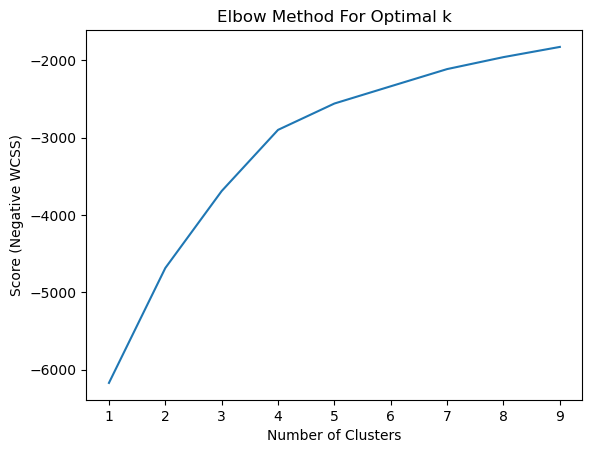

In [25]:
# Plotting the elbow curve
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Negative WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow plot indicates that the optimal number of clusters for the data is either 3 or 4, as the decrease in the score starts to level off from that point onwards, suggesting limited gains from additional clusters.

### Making an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

Based on the elbow chart, I would choose 4 clusters for the k-means algorithm. The decision for this number of clusters is informed by the observation that the slope of the curve from 1 to 3 is quite steep, indicating a significant reduction in the negative WCSS with each additional cluster. However, after 4 clusters, the slope of the curve decreases, and the rate of improvement diminishes, indicating that the addition of more clusters does not significantly improve the compactness of the clusters. Therefore, 4 clusters are likely to provide a reasonable balance between having too few or too many clusters

# Running the k-means algorithm

In [31]:
# Create the k-means object
kmeans = KMeans (n_clusters=4)

In [51]:
# Fit the k-means object to the data
kmeans. fit (df_renamed)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [52]:
df_renamed['clusters'] = kmeans.fit_predict(df_renamed)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
df_renamed

,age,bmi,num_children,smoker,insurance_charges,overweight,clusters
0,-1.440418,-0.453160,0,1,0.297857,0,0
1,-1.511647,0.509422,1,0,-0.954381,0,0
2,-0.799350,0.383155,3,0,-0.729373,0,2
3,-0.443201,-1.305052,0,0,0.719104,0,0
4,-0.514431,-0.292456,0,0,-0.777499,0,0
...,...,...,...,...,...,...,...
1332,0.767704,0.050269,3,0,-0.221263,0,2
1333,-1.511647,0.206053,0,0,-0.914695,0,0
1334,-1.511647,1.014490,0,0,-0.962287,0,0
1335,-1.297958,-0.797524,0,0,-0.931054,0,0


# Creating visualizations using your clustered data

### Plot 1: Insurance Charges vs. BMI, colored by clusters

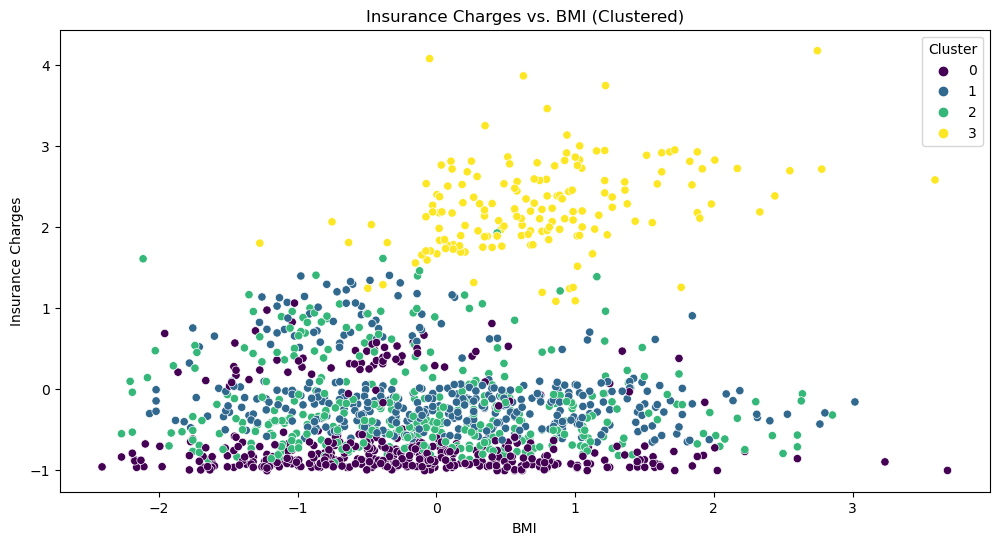

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='insurance_charges', hue='clusters', data=df_renamed, palette='viridis')
plt.title('Insurance Charges vs. BMI (Clustered)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend(title='Cluster')
plt.show()

The clusters in the scatterplot appear to segregate individuals primarily based on insurance charges rather than BMI, as there is significant vertical separation between clusters. Cluster 1, with high insurance charges regardless of BMI, could indicate high-risk individuals or smokers, supporting our hypothesis that factors beyond BMI influence insurance costs. Clusters 0, 2, and 3 show progressively increasing insurance charges, yet the BMI ranges overlap, suggesting that BMI alone isn't the sole determinant of insurance charges in these clusters

### Plot 2: Age vs. Insurance Charges, colored by clusters

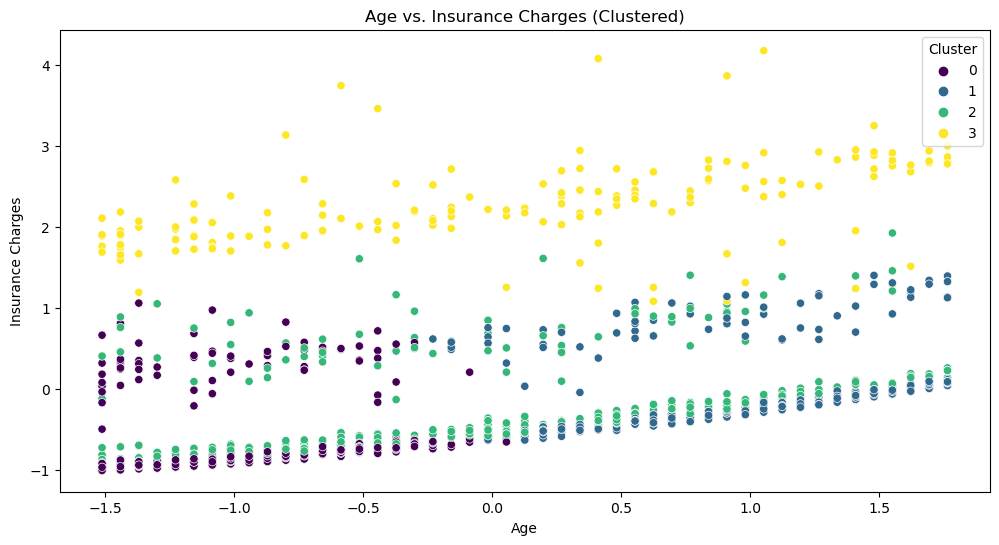

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='insurance_charges', hue='clusters', data=df_renamed, palette='viridis')
plt.title('Age vs. Insurance Charges (Clustered)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Cluster')
plt.show()

The graph displays four clusters where Cluster 1 stands out with higher insurance charges across all ages, possibly signifying the impact of high-risk attributes such as smoking, aligning with our hypothesis that smokers incur higher charges. This is contrasted with the other clusters, which show more variation in charges, potentially reflecting a mix of life stages and health profiles. The visualization suggests that while age may influence insurance costs, other factors like smoking status are also at play, warranting deeper analysis to validate our hypothesis on the significant effect of smoking on insurance charges regardless of age.

### Since the 'smoker' variable was crucial for the hypothesis, let's also see how it relates to the clusters
### Plot 3: Smoker vs. Insurance Charges, colored by clusters

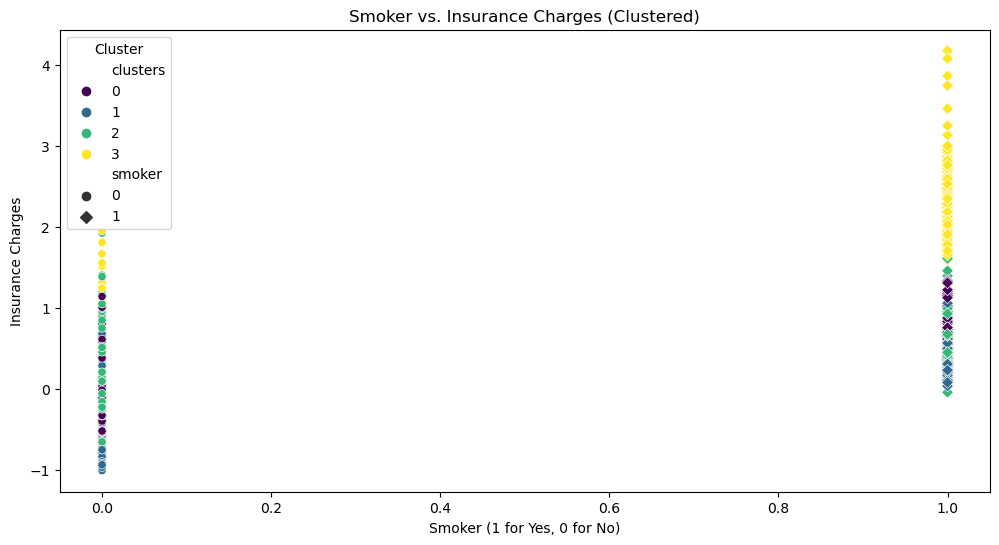

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='smoker', y='insurance_charges', hue='clusters', data=df_renamed, palette='viridis', style='smoker', markers=['o', 'D'])
plt.title('Smoker vs. Insurance Charges (Clustered)')
plt.xlabel('Smoker (1 for Yes, 0 for No)')
plt.ylabel('Insurance Charges')
plt.legend(title='Cluster')
plt.show()

The graph clearly separates individuals into two groups: smokers and non-smokers. Smokers, represented by the yellow data points (1 on the Smoker axis), are predominantly clustered in the group with higher insurance charges, regardless of age. On the other hand, non-smokers, depicted by the blue and green data points (0 on the Smoker axis), are spread across all clusters, typically with lower insurance charges.

This visualization strongly supports the initial hypothesis that smoking status significantly influences insurance charges, independent of age. It effectively demonstrates that smokers tend to face higher insurance costs compared to non-smokers, irrespective of their age group.

### Plot 4: Barplot for the average number of children by Cluster

/var/folders/fb/0vs0bt4n7g7bbt5lxwgg4ng80000gn/T/ipykernel_22921/3960148663.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='clusters', y='num_children', data=df_renamed, estimator=np.mean, ci=None)


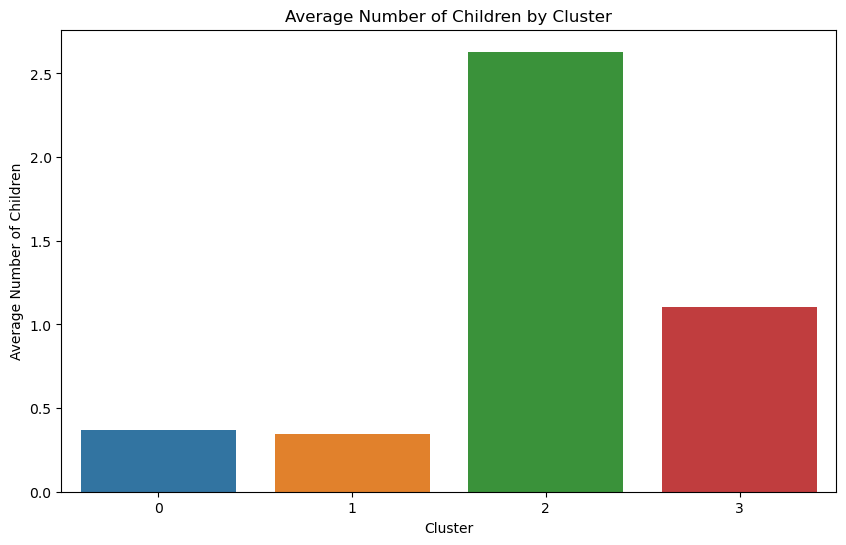

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='clusters', y='num_children', data=df_renamed, estimator=np.mean, ci=None)
plt.title('Average Number of Children by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Children')
plt.show()

Cluster 0 may represent a demographic such as young adults or single individuals, typically with no or fewer children. Cluster 1 could be older couples or those delaying childbearing. Cluster 2 might reflect groups where larger families are more common, possibly due to cultural or regional trends. Cluster 3, while lower than Cluster 2, may represent a mix or transition of the previous clusters. The clustering makes sense if it’s based on factors like age, marital status, and cultural backgrounds, which commonly influence family size.

### Plot 5: Boxplot for Insurance Charges by Cluster

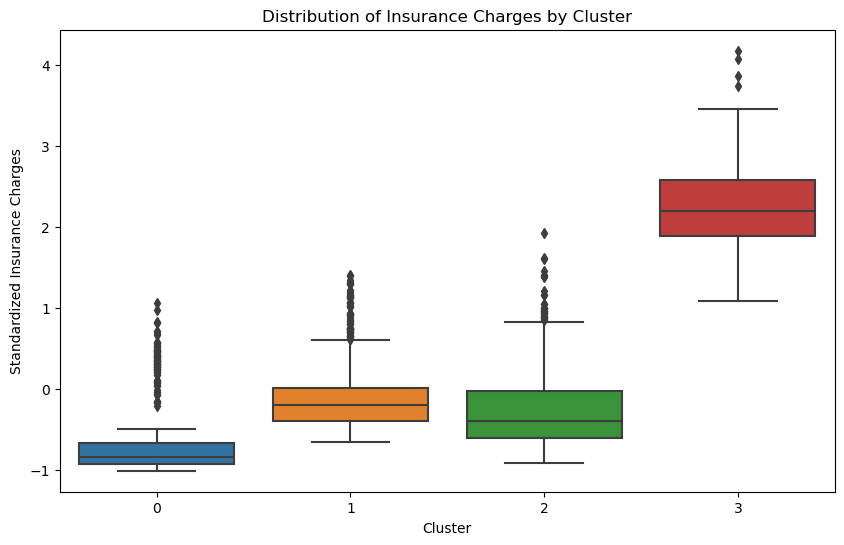

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clusters', y='insurance_charges', data=df_renamed)
plt.title('Distribution of Insurance Charges by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Insurance Charges')
plt.show()

The boxplot suggests that Cluster 0, with the lowest insurance charges, could represent non-smokers with low BMI, while Cluster 3, with the highest charges, might represent smokers with higher BMI. This pattern supports the alternative hypothesis (H1) that smokers have higher insurance charges than non-smokers at similar BMI levels. The significant differences between clusters imply that the null hypothesis (H0) might be rejected upon statistical testing.

### Plot 6: Count plot for the number of smokers and non-smokers in each cluster

AttributeError: 'numpy.int64' object has no attribute 'startswith'

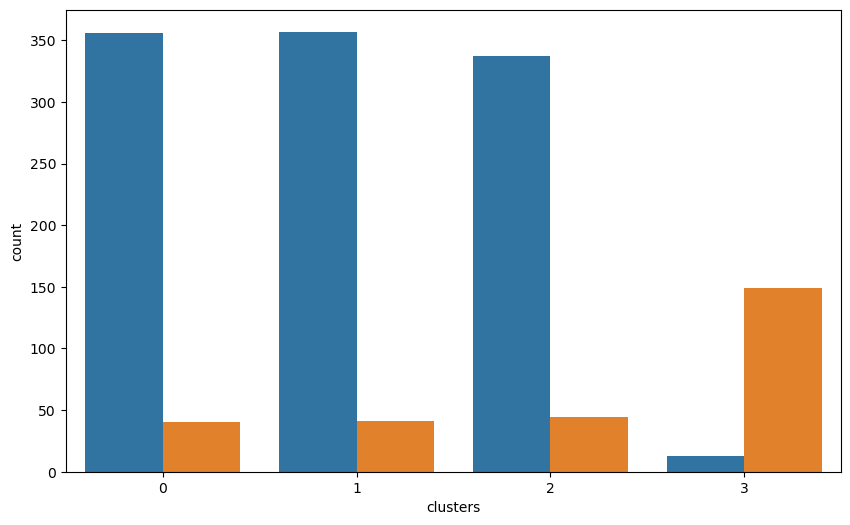

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', hue='smoker', data=df_renamed)
plt.title('Count of Smokers and Non-Smokers by Cluster')
plt.xlabel('Cluster')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

I can infer notable trends within our clusters that may correlate with our initial hypotheses concerning smoking status and insurance charges. Clusters 0 through 2 exhibit a substantial majority of non-smokers, while Cluster 3 deviates with a significantly higher smoker count. If we align this with our hypothesis, the data suggests a potential validation of the alternative hypothesis (H1) where smokers, predominantly in Cluster 3, could be incurring higher insurance charges. This visual data prompts a deeper statistical evaluation to confirm if the trend is indeed due to smoking status independently or if other variables come into play, ultimately influencing insurance charges as hypothesized.

# Calculating the descriptive statistics for clusters using the groupby() function

In [66]:
# Calculate descriptive statistics for each cluster
cluster_stats = df_renamed.groupby('clusters').describe(include='all')

In [64]:
# Print the descriptive statistics
print(cluster_stats)

            age                                                              \
          count      mean       std       min       25%       50%       75%   
clusters                                                                      
0         398.0 -0.979214  0.453765 -1.511647 -1.440418 -1.084269 -0.585661   
1         396.0  0.920237  0.527245 -0.229512  0.482785  0.981393  1.337542   
2         381.0  0.042320  0.828527 -1.511647 -0.656891  0.055407  0.696474   
3         162.0  0.056726  1.016697 -1.511647 -0.870580  0.162251  0.910164   

                      bmi            ... insurance_charges            \
               max  count      mean  ...               75%       max   
clusters                             ...                               
0         0.126637  398.0 -0.232641  ...         -0.663731  1.061187   
1         1.764921  396.0  0.026027  ...          0.012840  1.402702   
2         1.764921  381.0 -0.099429  ...         -0.019147  1.924788   
3         1.76

The smoker variable is not included in the descriptive statistics. This is likely because the smoker variable is categorical, and descriptive statistics such as mean, standard deviation, etc., are not applicable to categorical variables.

The descriptive statistics demonstrate distinct characteristics among the clusters:

Age: Cluster 3 exhibits a broader age range compared to the other clusters, indicating diverse age profiles across the clusters.

BMI: Notably, Cluster 3 displays a higher average BMI compared to the other clusters, suggesting a potential association between BMI and cluster membership.

Insurance Charges: Cluster 3 stands out with substantially higher insurance charges compared to the other clusters, indicating a higher-risk profile within this group.

Overweight: Interestingly, none of the clusters have individuals classified as overweight, suggesting that BMI alone may not capture all aspects of health risk within the dataset.

These findings align with our hypothesis, suggesting that both age and BMI play a role in determining insurance charges, particularly evident in Cluster 3, which represents individuals with older age, higher BMI, and elevated insurance charges.

In [69]:
# Calculate descriptive statistics for each cluster and smoker group
cluster_smoker_stats = df_renamed.groupby(['clusters', 'smoker']).describe(include='all')

In [68]:
# Print the descriptive statistics
print(cluster_smoker_stats)

                   age                                                    \
                 count      mean       std       min       25%       50%   
clusters smoker                                                            
0        0       357.0 -0.971339  0.457787 -1.511647 -1.440418 -1.084269   
         1        41.0 -1.047785  0.415985 -1.511647 -1.440418 -1.155499   
1        0       356.0  0.939976  0.510360 -0.158282  0.554015  0.981393   
         1        40.0  0.744555  0.639826 -0.229512  0.197866  0.625245   
2        0       337.0  0.050123  0.836427 -1.511647 -0.585661  0.055407   
         1        44.0 -0.017442  0.771690 -1.511647 -0.656891  0.019792   
3        0        13.0  0.696474  0.770467 -1.369188  0.411556  0.910164   
         1       149.0  0.000909  1.018455 -1.511647 -0.941810 -0.015823   

                                       bmi            ... insurance_charges  \
                      75%       max  count      mean  ...               75%   
clust

The descriptive statistics reveal interesting patterns in age distribution across clusters and smoker groups, which are pertinent to our hypothesis regarding the interplay between age, smoking status, and BMI in determining insurance charges.

In particular, non-smokers consistently exhibit slightly higher mean ages across clusters compared to smokers. This observation supports our hypothesis that age may influence insurance charges, especially when considering smoking behavior. Moreover, when examining these age differences in conjunction with BMI, we might uncover nuanced relationships between health metrics and insurance costs.

These findings imply that age-related factors, combined with BMI and smoking status, contribute to variations in insurance charges. Further exploration of these relationships could provide valuable insights into how lifestyle choices and health metrics collectively impact insurance premiums.

# Propose what these results could be useful for in future steps of an analytics pipeline.

These results offer valuable insights that can inform future steps in an analytics pipeline, such as:

1. **Feature Engineering:** The identified clusters based on age, BMI, and smoking status can serve as new features in predictive modeling tasks. These features capture nuanced relationships between demographic factors and insurance charges, potentially improving model performance.

2. **Segmentation Analysis:** The clusters can be leveraged for customer segmentation, allowing insurance companies to tailor their offerings and marketing strategies to different groups' needs and preferences. For example, insurers can design targeted interventions or promotions for specific segments based on their risk profiles.

3. **Risk Assessment:** Understanding how age, BMI, and smoking status intersect to influence insurance charges can enhance risk assessment processes. Insurers can use these insights to refine risk evaluation models, leading to more accurate pricing and underwriting decisions.

4. **Policy Design:** Insights from the analysis can inform the design of insurance policies that cater to diverse customer segments. For instance, insurers may develop specialized packages or incentives aimed at encouraging healthier behaviors among certain clusters, ultimately reducing claims and improving profitability.

5. **Customer Engagement:** By recognizing the factors driving variations in insurance charges, insurers can better engage with customers through personalized communications and services. This can foster stronger relationships, increase customer satisfaction, and enhance retention rates.

Overall, integrating these findings into an analytics pipeline can empower insurance companies to optimize various aspects of their operations, from product development and pricing to customer management and risk mitigation.

**Proposed Utilization of Results in Healthcare Analytics Pipeline**

The insights derived from the analysis of demographic factors such as age, BMI, and smoking status can be highly beneficial for various components of a healthcare analytics pipeline:

1. **Personalized Healthcare Plans:** These insights can facilitate the development of personalized healthcare plans tailored to individual patient needs. By incorporating demographic information into care plans, healthcare providers can offer interventions and preventive measures that are targeted and optimized for specific patient segments.

2. **Disease Prevention Strategies:** Understanding the relationship between lifestyle factors like smoking status and healthcare costs can inform the design of disease prevention strategies. Healthcare organizations can develop targeted interventions and public health campaigns aimed at reducing smoking rates and promoting healthier behaviors, thereby mitigating the risk of smoking-related illnesses and lowering healthcare expenditures.

3. **Healthcare Resource Allocation:** Analysis of patient clusters based on demographic factors can help healthcare organizations allocate resources more efficiently. By identifying high-risk patient groups and understanding their healthcare needs, providers can prioritize resource allocation to areas where it is most needed, optimizing healthcare delivery and resource utilization.

4. **Chronic Disease Management:** Insights from the analysis can aid in the development of proactive chronic disease management programs. By identifying high-risk patient clusters, healthcare providers can implement targeted monitoring and management strategies to improve outcomes for patients with chronic conditions, ultimately reducing healthcare costs associated with disease exacerbations and complications.

5. **Health Policy Development:** Policymakers can use the findings to inform the development of evidence-based health policies. By understanding the factors contributing to variations in healthcare costs and outcomes, policymakers can design policies that promote population health, reduce healthcare disparities, and enhance the affordability and accessibility of healthcare services.

Incorporating these insights into a healthcare analytics pipeline can lead to more effective interventions, improved patient outcomes, and optimized resource allocation, ultimately advancing the goals of healthcare delivery and public health.